In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:
# f(x,z) = 2x - 3z + 5 + <small noise>
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))
# inputs
generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1, 1, (observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise

# save into an npz file called "TF_intro"
np.savez(os.getcwd()+'/Data/TF_intro', inputs=generated_inputs, targets=generated_targets)

In [4]:
# Load the training data from the NPZ
training_data = np.load('TF_intro.npz')

In [8]:
input_size = 2
output_size = 1
model = tf.keras.Sequential([
                            # Each 'layer' is listed here
                            # The method 'Dense' indicates, our mathematical operation to be (xw + b)
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

# We can also define a custom optimizer, where we can specify the learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='huber')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - 15ms/step - loss: 10.8672
Epoch 2/100
32/32 - 0s - 1ms/step - loss: 4.1969
Epoch 3/100
32/32 - 0s - 1ms/step - loss: 3.4165
Epoch 4/100
32/32 - 0s - 1ms/step - loss: 2.7964
Epoch 5/100
32/32 - 0s - 1ms/step - loss: 2.1860
Epoch 6/100
32/32 - 0s - 1ms/step - loss: 1.5723
Epoch 7/100
32/32 - 0s - 1ms/step - loss: 1.0123
Epoch 8/100
32/32 - 0s - 1ms/step - loss: 0.5667
Epoch 9/100
32/32 - 0s - 1ms/step - loss: 0.3315
Epoch 10/100
32/32 - 0s - 1ms/step - loss: 0.2261
Epoch 11/100
32/32 - 0s - 1ms/step - loss: 0.1904
Epoch 12/100
32/32 - 0s - 1ms/step - loss: 0.1792
Epoch 13/100
32/32 - 0s - 1ms/step - loss: 0.1753
Epoch 14/100
32/32 - 0s - 2ms/step - loss: 0.1804
Epoch 15/100
32/32 - 0s - 1ms/step - loss: 0.1778
Epoch 16/100
32/32 - 0s - 1ms/step - loss: 0.1749
Epoch 17/100
32/32 - 0s - 1ms/step - loss: 0.1779
Epoch 18/100
32/32 - 0s - 1ms/step - loss: 0.1768
Epoch 19/100
32/32 - 0s - 1ms/step - loss: 0.1737
Epoch 20/100
32/32 - 0s - 1ms/step - loss: 0.1757
Epoch 2

In [9]:
# Extracting the weights and biases is achieved quite easily
model.layers[0].get_weights()

[array([[ 1.9375527],
        [-2.995496 ]], dtype=float32),
 array([4.9831223], dtype=float32)]

In [10]:
# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
weights = model.layers[0].get_weights()[0]
print(weights)

[[ 1.9375527]
 [-2.995496 ]]


In [11]:
# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
bias = model.layers[0].get_weights()[1]
bias

array([4.9831223], dtype=float32)

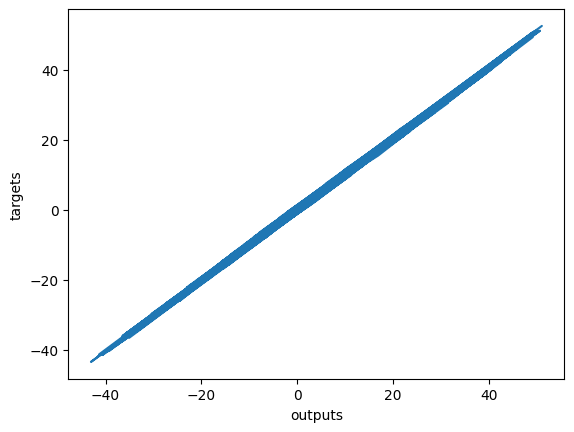

In [12]:
model.predict_on_batch(training_data['inputs']).round(1)
training_data['targets'].round(1)
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()